In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

%config InlineBackend.figure_format = 'svg'

In [2]:
total_people = 10000
experiment_run = 100
people_chose = 100
score_scale = 1000
luck_weight = 5

In [3]:
def report(total_people=total_people, people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight):
    skills = [random.choice(range(0, score_scale+1)) /
              (score_scale/100) for x in range(1, total_people+1)]
    lucks = [random.choice(range(0, score_scale+1)) /
             (score_scale/100) for x in range(1, total_people+1)]
    data = {'Skill': skills, 'Luck': lucks}
    df = pd.DataFrame(data)
    df['Weighted Average'] = (
        df['Skill'] * (1-luck_weight*0.01) + df['Luck'] * (luck_weight*0.01))
    df = df.sort_values(['Weighted Average'], ascending=False)
    df = df.reset_index(drop=True)
    byskillwinners = list(df.sort_values(
        ['Skill'], ascending=False).iloc[0:people_chose].index)
    output = len([i for i in range(0, people_chose) if i in byskillwinners])
    return [output, df]


In [4]:
def experiment_loop(experiment_run=experiment_run, total_people=total_people, people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight):
    subaro_lesbians = []
    for i in range(0, experiment_run):
        subaro_lesbians.append(report(total_people=total_people, people_chose=people_chose,
                               score_scale=score_scale, luck_weight=luck_weight)[0])
    subaro_lesbians = np.array(subaro_lesbians)
    return [subaro_lesbians.mean(), (people_chose-subaro_lesbians.mean()), subaro_lesbians]


# Bias Rate

In [5]:
print(f"{experiment_loop()[0]} People were fairly chosen, {experiment_loop()[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(experiment_loop()[1]/people_chose)*100}')

52.12 People were fairly chosen, 47.61 would've lost if not for their luck
Luck Bias Rate = 48.9


# Difference between skill of winners

In [6]:
df = report()[1]
winnersbyweight = df['Skill'].iloc[:people_chose].sort_values(ascending=False).reset_index(drop=True)
winnersbyskill = df.sort_values(by=['Skill'], ascending=False).iloc[:people_chose]['Skill'].reset_index(drop=True)

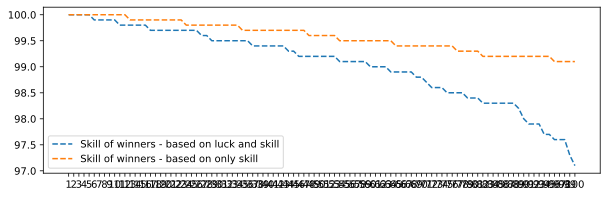

In [7]:
ax = winnersbyweight.plot(figsize=(10, 3), style='--')
ax.plot(winnersbyskill,'--')
ax.set_xticks(range(0, people_chose))
ax.set_xticklabels(range(1, people_chose+1))
ax.legend(['Skill of winners - based on luck and skill', 'Skill of winners - based on only skill'])
plt.show()

# Luck weight affect on Bias Rate

###### 1%

In [8]:
results = experiment_loop(luck_weight=1)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


86.64 People were fairly chosen, 13.36 would've lost if not for their luck
Luck Bias Rate = 13.36


###### 5%

In [9]:
results = experiment_loop(luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


52.54 People were fairly chosen, 47.46 would've lost if not for their luck
Luck Bias Rate = 47.46


###### 10%

In [10]:
results = experiment_loop(luck_weight=10)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


37.84 People were fairly chosen, 62.16 would've lost if not for their luck
Luck Bias Rate = 62.16


###### 20%

In [11]:
results = experiment_loop(luck_weight=20)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/people_chose)*100}')


26.14 People were fairly chosen, 73.86 would've lost if not for their luck
Luck Bias Rate = 73.86


# Winner to participant relation affect on Bias Rate
luck weight = 5%

###### 0.1 %

In [12]:
results = experiment_loop(people_chose=10, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/10)*100}')

1.48 People were fairly chosen, 8.52 would've lost if not for their luck
Luck Bias Rate = 85.2


###### 1%

In [13]:
results = experiment_loop(people_chose=100, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/100)*100}')

51.92 People were fairly chosen, 48.08 would've lost if not for their luck
Luck Bias Rate = 48.08


###### 5%

In [14]:
results = experiment_loop(people_chose=500, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/500)*100}')

434.61 People were fairly chosen, 65.38999999999999 would've lost if not for their luck
Luck Bias Rate = 13.077999999999998


###### 10%

In [15]:
results = experiment_loop(people_chose=1000, total_people=10000,luck_weight=5)
print(
    f"{results[0]} People were fairly chosen, {results[1]} would've lost if not for their luck")
print(f'Luck Bias Rate = {(results[1]/1000)*100}')

933.55 People were fairly chosen, 66.45000000000005 would've lost if not for their luck
Luck Bias Rate = 6.645000000000005


# Luck Bias Plot

###### 1%

In [16]:
def luckBiasRate(experiment_run=experiment_run, total_people=total_people, people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight):
    results = experiment_loop(experiment_run=experiment_run, total_people=total_people,
                              people_chose=people_chose, score_scale=score_scale, luck_weight=luck_weight)
    return ((results[1]/people_chose)*100)


In [17]:
total_people = 10000
start_ratio = 1/1000
end_ratio = 1/10

accuracy = 50

people_chose = np.linspace(total_people*start_ratio, total_people*end_ratio, accuracy)

biases_1 = []
ratios_1 = []
for item in people_chose:
    biases_1.append(luckBiasRate(luck_weight=1, people_chose=int(item), total_people=total_people))
    ratios_1.append(item/total_people)

In [18]:
# fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
# ax.plot(ratios_1, biases_1, marker='o')

# ax.set_xlabel(f'Winner per Participant')  
# ax.set_ylabel("Bias (Luck's role in choosing winners) %")  
# ax.set_title("Luck's effect / Competitiveness") 

# plt.show()

###### 5%

In [19]:
total_people = 10000
start_ratio = 1/1000
end_ratio = 1/10

people_chose = np.linspace(total_people*start_ratio, total_people*end_ratio, accuracy)

biases_5 = []
ratios_5 = []
for item in people_chose:
    biases_5.append(luckBiasRate(luck_weight=5, people_chose=int(item), total_people=total_people))
    ratios_5.append(item/total_people)

In [20]:
# fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
# ax.plot(ratios_5, biases_5, marker='o')

# ax.set_xlabel(f'Winner per Participant')  
# ax.set_ylabel("Bias (Luck's role in choosing winners) %")  
# ax.set_title("Luck's effect / Competitiveness") 

# plt.show()

###### 10%

In [21]:
total_people = 10000
start_ratio = 1/1000
end_ratio = 1/10

people_chose = np.linspace(total_people*start_ratio, total_people*end_ratio, accuracy)

biases_10 = []
ratios_10 = []
for item in people_chose:
    biases_10.append(luckBiasRate(luck_weight=10, people_chose=int(item), total_people=total_people))
    ratios_10.append(item/total_people)

In [22]:
# fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
# ax.plot(ratios_10, biases_10, marker='o')

# ax.set_xlabel(f'Winner per Participant')  
# ax.set_ylabel("Bias (Luck's role in choosing winners) %")  
# ax.set_title("Luck's effect / Competitiveness") 

# plt.show()

###### 20%

In [23]:
total_people = 10000
start_ratio = 1/1000
end_ratio = 1/10

people_chose = np.linspace(total_people*start_ratio, total_people*end_ratio, accuracy)

biases_20 = []
ratios_20 = []
for item in people_chose:
    biases_20.append(luckBiasRate(luck_weight=20, people_chose=int(item), total_people=total_people))
    ratios_20.append(item/total_people)

In [24]:
# fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
# ax.plot(ratios_20, biases_20, marker='o')

# ax.set_xlabel(f'Winner per Participant')  
# ax.set_ylabel("Bias (Luck's role in choosing winners) %")  
# ax.set_title("Luck's effect / Competitiveness") 

# plt.show()

# Combined Plot

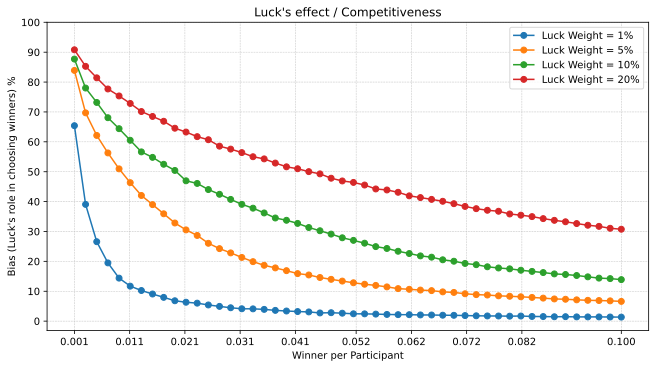

In [42]:
tick_count = 10
ticks = np.array([ratios_1[0]] + ([round(x,3) for i,x in enumerate(ratios_1)  if i % (accuracy/tick_count) == 0])[1:-1] + [ratios_1[-1]])

fig, ax = plt.subplots(figsize=(9, 5), layout='constrained')

ax.plot(ratios_1, biases_1, marker='o', label='Luck Weight = 1%')
ax.plot(ratios_5, biases_5, marker='o', label='Luck Weight = 5%')
ax.plot(ratios_10, biases_10, marker='o', label='Luck Weight = 10%')
ax.plot(ratios_20, biases_20, marker='o', label='Luck Weight = 20%')

ax.set_xlabel(f'Winner per Participant')  
ax.set_ylabel("Bias (Luck's role in choosing winners) %")  
ax.set_title("Luck's effect / Competitiveness") 

ax.grid(color='silver', linestyle='--', linewidth=0.5)

ax.legend()

ax.set_xticks(ticks)
ax.set_yticks(np.arange(0,101,10))

# plt.savefig('./result.svg', bbox_inches='tight')

plt.show()

